## Import libraries

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score

## Load data

In [2]:
dataset = pd.read_json('Brisbane_CityBike.json','r',encoding='utf-8')
dataset.head()

,number,name,address,latitude,longitude
0,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,-27.482279,153.028723
1,91,91 - MAIN ST / DARRAGH ST,Main St / Darragh St,-27.470590,153.036046
2,88,88 - SYDNEY ST FERRY TERMINAL / PARK,Sydney St Ferry Terminal / Park,-27.474531,153.042728
3,75,75 - BROWNE ST / JAMES ST,Browne St / James St,-27.461881,153.046986
4,98,98 - KURILPA POINT / MONTAGUE RD,Kurilpa Point / Montague Rd,-27.469658,153.016696


In [3]:
dataset.shape

(149, 5)

## Extract 'latitude' and 'longitude' as features

In [4]:
X = dataset.iloc[:,3:5]
X.head()

,latitude,longitude
0,-27.482279,153.028723
1,-27.470590,153.036046
2,-27.474531,153.042728
3,-27.461881,153.046986
4,-27.469658,153.016696


## Find the optimal K and build KMeans model

In [6]:
# use "elbow function" , calinski_harabasz_score and silhouette_score to choose K
distortions = []
silhouette_scores = []
calinski_harabasz_scores = []
kRange=range(2,10)
for k in kRange:
    model = KMeans(n_clusters=k, random_state=9)
    y_pred = model.fit_predict(X)
    distortion=sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    distortions.append(distortion)
    calinski_harabasz_scores.append(calinski_harabasz_score(X, y_pred))
    silhouette_scores.append(silhouette_score(X,y_pred))

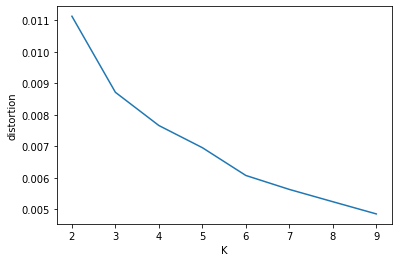

In [7]:
plt.plot(kRange,distortions)
plt.xlabel('K')
plt.ylabel('distortion')
plt.savefig("elbow_function.png") #save the metric curve
plt.show()
# very hard to find the "elbow", maybe k = 3, 4 or 6 is optimal

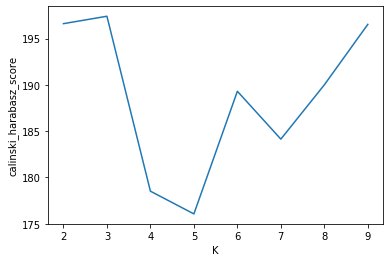

In [8]:
plt.plot(kRange,calinski_harabasz_scores)
plt.xlabel('K')
plt.ylabel('calinski_harabasz_score')
plt.savefig("calinski_harabasz_score.png") #save the metric curve
plt.show()
# calinski_harabasz_score: the bigger the better, k = 3 or 6 is a local optimal

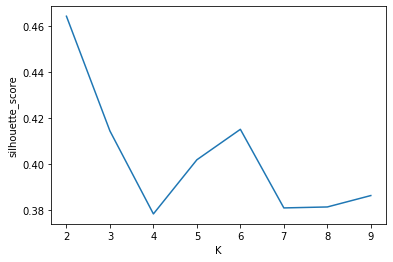

In [9]:
plt.plot(kRange,silhouette_scores)
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.savefig("silhouette_score.png") #save the metric curve
plt.show()
# silhouette_score: the bigger the better, k = 6 is a local optimal

In [10]:
# choose k = 6 by considering the 3 metrics
model = KMeans(n_clusters=6, random_state=9)
y_pred = model.fit_predict(X)

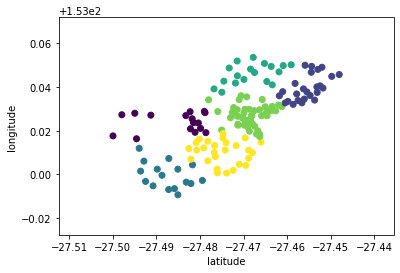

In [11]:
plt.scatter(X['latitude'], X['longitude'], c=y_pred)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.savefig("result2D.png") #save clustering result
plt.show()

## Extract 'number' as feature

In [12]:
X = dataset['number']
X = X.to_numpy()

In [13]:
X = X.reshape(-1,1)

## Build KMeans model

In [14]:
# clustering 1D data might not be meaningful
# but we can still try to see the result
kmeans = KMeans(n_clusters=5, random_state=9)
y_pred = kmeans.fit_predict(X)

In [15]:
kmeans.cluster_centers_

array([[  20.27027027],
       [1101.        ],
       [  96.        ],
       [  58.5       ],
       [ 132.5       ]])

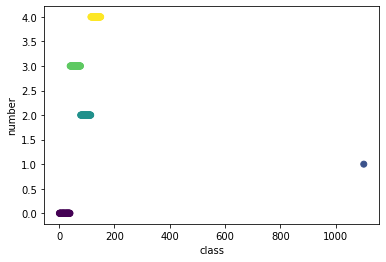

In [16]:
plt.scatter(X,y_pred, c=y_pred)
plt.xlabel('class')
plt.ylabel('number')
plt.show()
# we can see a extreme sample here

In [17]:
unique,counts=np.unique(kmeans.labels_,return_counts=True)
dict(zip(unique,counts)) 
# take a look for how many samples in each class
# there is only one bike station in class 1

{0: 37, 1: 1, 2: 37, 3: 38, 4: 36}

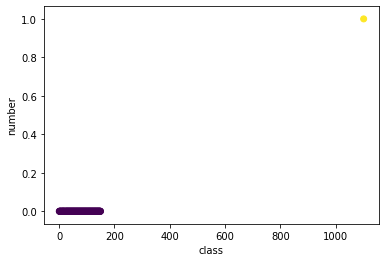

In [18]:
# clustering result for k = 2
kmeans = KMeans(n_clusters=2, random_state=9)
y_pred = kmeans.fit_predict(X)
plt.scatter(X,y_pred, c=y_pred)
plt.xlabel('class')
plt.ylabel('number')
plt.savefig("result1D.png")
plt.show()
# So the conclusion is that k = 2 is optimal for 1D clustering in "number"
# For the extreme big station, we can call it 'Super Station'
# For the rest, we can call them 'Normal Station'